# Regresión lineal del precio de la vivienda en EE. UU.

## Primer de regresión lineal

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X. El caso de una variable explicativa se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple.

Los modelos de regresión lineal a menudo se ajustan utilizando el enfoque de mínimos cuadrados, pero también pueden ajustarse de otras formas, como minimizando la "falta de ajuste" en alguna otra norma (como con la regresión de desviaciones mínimas absolutas), o minimizando una penalización. versión de la función de pérdida por mínimos cuadrados como en la regresión de crestas (penalización de $L_2$ -norm) y lazo (penalización de $L_1$ -norm). Por el contrario, el enfoque de mínimos cuadrados se puede utilizar para ajustar modelos que no son modelos lineales. Por lo tanto, aunque los términos "mínimos cuadrados" y "modelo lineal" están estrechamente relacionados, no son sinónimos.

### Importando paquetes y el conjunto de datos

In [1]:
pip install numpy pandas matplotlib seaborn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [33]:
#df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [35]:
# Solo columnas categóricas (object)
categorical_cols = df.select_dtypes(include=['object']).columns

# Contar valores únicos en cada columna
unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)

print(unique_counts)

Doctor                9416
Name                  9378
Hospital              8639
Discharge Date        1834
Date of Admission     1815
Blood Type               8
Medical Condition        6
Insurance Provider       5
Medication               5
Admission Type           3
Test Results             3
Gender                   2
dtype: int64


In [36]:
date = pd.to_datetime(df["Date of Admission"])
discharga = pd.to_datetime(df["Discharge Date"])

df["duracion"] = (discharga - date).dt.days

In [37]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [38]:
one_hot_cols = ["Medical Condition", "Insurance Provider",
                "Medication", "Admission Type", "Test Results"]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)
#df = df.astype({col: int for col in df.select_dtypes('bool').columns})
df

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,...,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,Tiffany Ramirez,81,1,O-,2022-11-17,Patrick Parker,Wallace-Hamilton,37490.983364,146,2022-12-01,...,False,False,False,False,True,False,False,False,True,False
1,Ruben Burns,35,0,O+,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",47304.064845,404,2023-06-15,...,False,True,False,False,False,True,False,False,False,True
2,Chad Byrd,61,0,B-,2019-01-09,Paul Baker,Walton LLC,36874.896997,292,2019-02-08,...,False,True,False,False,False,True,False,False,False,True
3,Antonio Frederick,49,0,B-,2020-05-02,Brian Chandler,Garcia Ltd,23303.322092,480,2020-05-03,...,False,False,False,True,False,False,True,True,False,False
4,Mrs. Brandy Flowers,51,0,O-,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",18086.344184,477,2021-08-02,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,0,A+,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",39606.840083,110,2022-08-02,...,True,False,False,False,True,False,False,True,False,False
9996,Stephanie Evans,47,1,AB+,2022-01-06,Christopher Yates,Nash-Krueger,5995.717488,244,2022-01-29,...,True,False,False,False,False,True,False,False,False,True
9997,Christopher Martinez,54,0,B-,2022-07-01,Robert Nicholson,Larson and Sons,49559.202905,312,2022-07-15,...,True,False,False,False,True,False,False,False,False,True
9998,Amanda Duke,84,0,A+,2020-02-06,Jamie Lewis,Wilson-Lyons,25236.344761,420,2020-02-26,...,False,False,False,True,False,False,True,False,False,True


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [41]:
df.describe()


,Age,Gender,Billing Amount,Room Number,duracion
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,51.452200,0.507500,25516.806778,300.082000,15.561800
std,19.588974,0.499969,14067.292709,115.806027,8.612038
min,18.000000,0.000000,1000.180837,101.000000,1.000000
25%,35.000000,0.000000,13506.523967,199.000000,8.000000
50%,52.000000,1.000000,25258.112566,299.000000,16.000000
75%,68.000000,1.000000,37733.913727,400.000000,23.000000
max,85.000000,1.000000,49995.902283,500.000000,30.000000


**El método 'columns' obtiene los nombres de las columnas (características)**

In [40]:
df.columns


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Date of Admission', 'Doctor',
       'Hospital', 'Billing Amount', 'Room Number', 'Discharge Date',
       'duracion', 'Medical Condition_Arthritis', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross',
       'Insurance Provider_Cigna', 'Insurance Provider_Medicare',
       'Insurance Provider_UnitedHealthcare', 'Medication_Aspirin',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Admission Type_Elective',
       'Admission Type_Emergency', 'Admission Type_Urgent',
       'Test Results_Abnormal', 'Test Results_Inconclusive',
       'Test Results_Normal'],
      dtype='object')

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

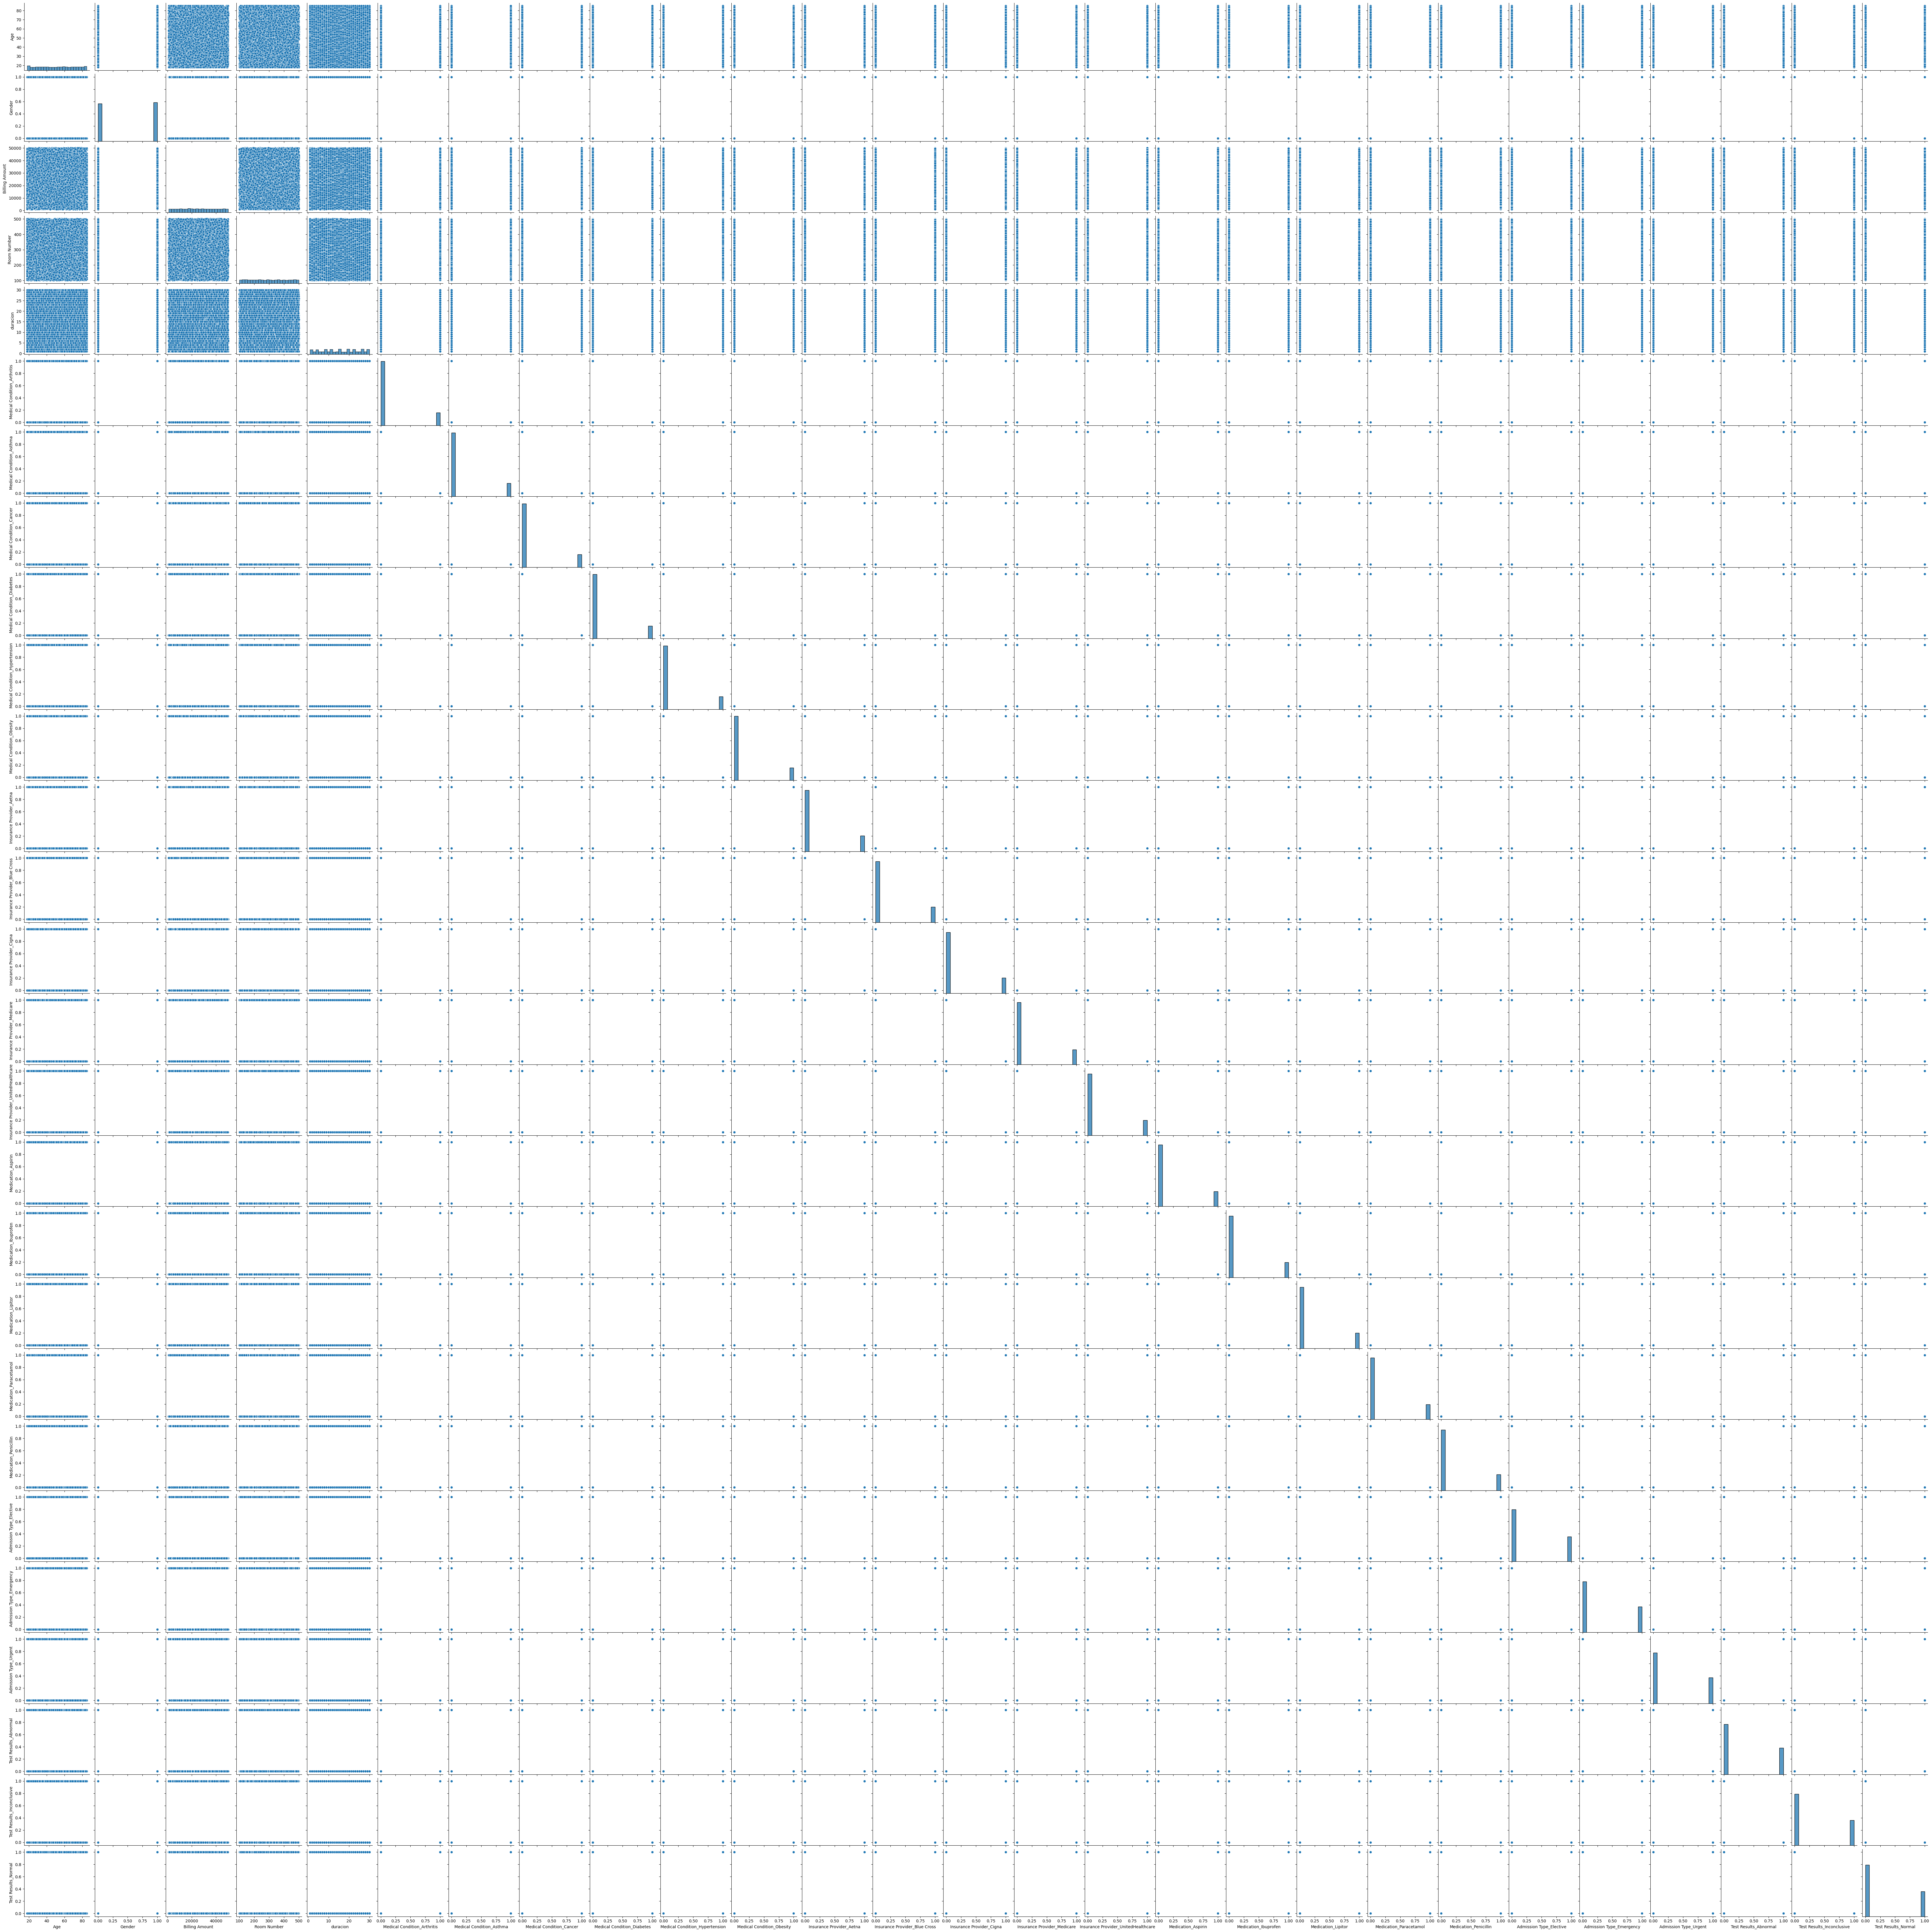

In [42]:
sns.pairplot(df)

**Distribución del precio (la cantidad prevista)**

<Axes: ylabel='Frequency'>

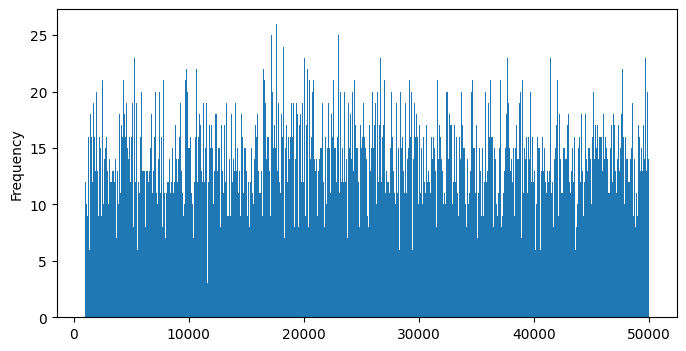

In [10]:

df['Billing Amount'].plot.hist(bins=800,figsize=(8,4))

**Matriz de correlación y heatmap**

In [43]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Age,Gender,Billing Amount,Room Number,duracion
Age,1.000000,0.008099,-0.009483,-0.005371,0.009111
Gender,0.008099,1.000000,-0.002340,-0.002864,0.006361
Billing Amount,-0.009483,-0.002340,1.000000,-0.006160,-0.013507
Room Number,-0.005371,-0.002864,-0.006160,1.000000,0.009610
duracion,0.009111,0.006361,-0.013507,0.009610,1.000000


<Axes: >

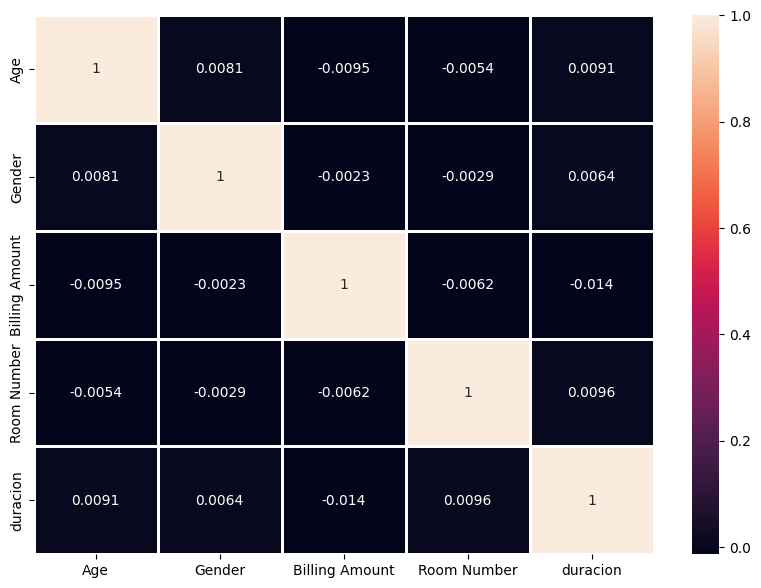

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [47]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Billing Amount',
 'Room Number',
 'Discharge Date',
 'duracion',
 'Medical Condition_Arthritis',
 'Medical Condition_Asthma',
 'Medical Condition_Cancer',
 'Medical Condition_Diabetes',
 'Medical Condition_Hypertension',
 'Medical Condition_Obesity',
 'Insurance Provider_Aetna',
 'Insurance Provider_Blue Cross',
 'Insurance Provider_Cigna',
 'Insurance Provider_Medicare',
 'Insurance Provider_UnitedHealthcare',
 'Medication_Aspirin',
 'Medication_Ibuprofen',
 'Medication_Lipitor',
 'Medication_Paracetamol',
 'Medication_Penicillin',
 'Admission Type_Elective',
 'Admission Type_Emergency',
 'Admission Type_Urgent',
 'Test Results_Abnormal',
 'Test Results_Inconclusive',
 'Test Results_Normal']

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [48]:
#X = df[l_column[0:len_feature-2]]
#y = df[l_column[len_feature-2]]

no = ["Name", "Date of Admission", "Discharge Date", "Doctor", "Hospital", "Room Number","Blood Type", "Billing Amount"]
X= df.drop(columns=no)
y=df["Billing Amount"]

In [15]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (10000, 7)
Tamaño de Variable Objetivo: (10000,)


In [49]:
X.head()

,Age,Gender,duracion,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Aetna,...,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,81,1,14,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,35,0,14,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,61,0,30,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,49,0,1,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
4,51,0,24,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


In [50]:
y.head()

,Billing Amount
0,37490.983364
1,47304.064845
2,36874.896997
3,23303.322092
4,18086.344184


### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [51]:
pip install scikit-learn

In [52]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [54]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (8000, 25)
Tamaño del conjunto de características de prueba: (2000, 25)
Tamaño de la variable objetivo del entrenamiento: (8000,)
Tamaño de la variable objetivo de prueba: (2000,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [56]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [57]:
lm.fit(X_train,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression()

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [58]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 26234.496156728426


In [59]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [  -7.40219406 -171.11067362  -18.53799712 -443.0354609   -53.48595383
  129.76251992  577.31139537   70.82347379 -281.37597435  366.86287705
    2.90809727  206.43745445 -460.49158015 -115.71684862   51.82203103
   90.52223356  521.88730995 -375.70325295 -288.52832159  318.32451961
 -920.36058015  602.03606054 -109.69841058  150.18600417  -40.48759359]


In [60]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Age,-7.402194
Gender,-171.110674
duracion,-18.537997
Medical Condition_Arthritis,-443.035461
Medical Condition_Asthma,-53.485954
Medical Condition_Cancer,129.762520
Medical Condition_Diabetes,577.311395
Medical Condition_Hypertension,70.823474
Medical Condition_Obesity,-281.375974
Insurance Provider_Aetna,366.862877


### Cálculo de errores estándar y estadística t para los coeficientes

In [62]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0] * len(X_train.columns) #cantidad de columnas que tenemos
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']

In [63]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Admission Type_Urgent > 
Medical Condition_Diabetes > 
Medication_Lipitor > 
Admission Type_Elective > 
Insurance Provider_Aetna > 
Insurance Provider_Cigna > 
Test Results_Inconclusive > 
Medical Condition_Cancer > 
Medication_Ibuprofen > 
Medical Condition_Hypertension > 
Medication_Aspirin > 
Insurance Provider_Blue Cross > 
Test Results_Normal > 
Medical Condition_Asthma > 
Insurance Provider_UnitedHealthcare > 
Test Results_Abnormal > 
Gender > 
Medical Condition_Obesity > 
Medication_Penicillin > 
Age > 
Medication_Paracetamol > 
duracion > 
Medical Condition_Arthritis > 
Insurance Provider_Medicare > 
Admission Type_Emergency


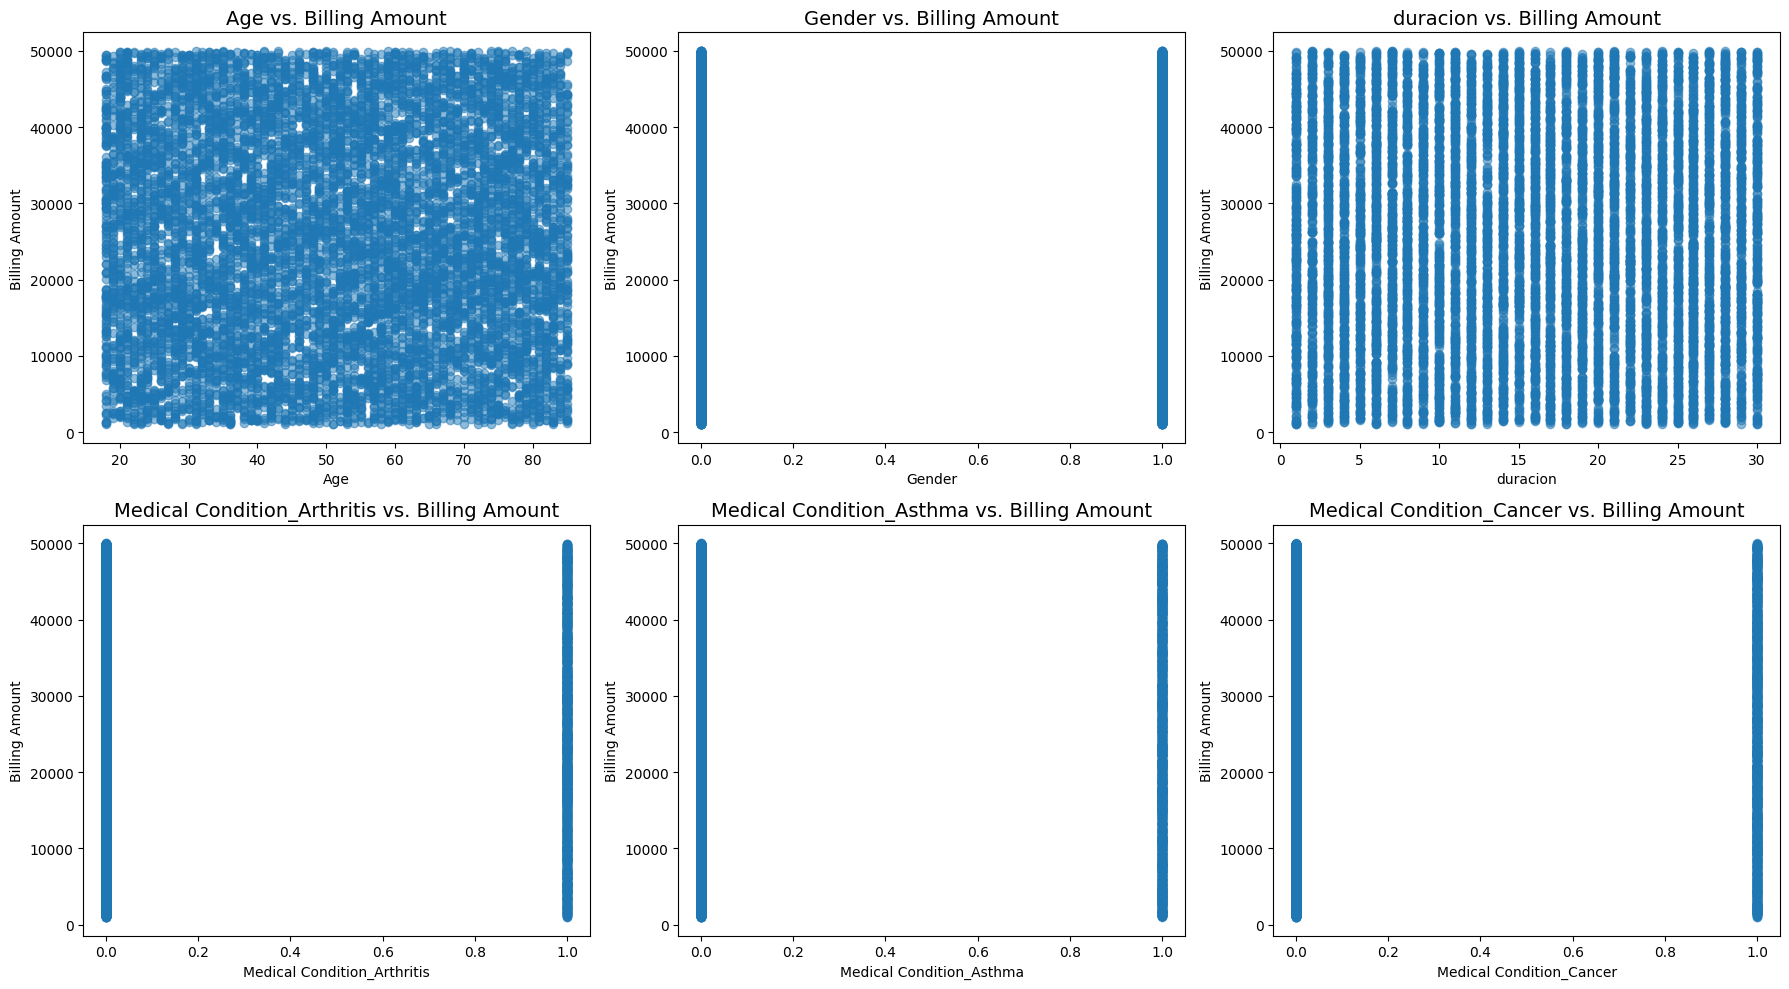

In [65]:

l = list(cdf.index)


n = 6
cols_to_plot = l[:n]


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df["Billing Amount"], alpha=0.5)
    axes[i].set_title(f"{col} vs. Billing Amount", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Billing Amount")

plt.tight_layout()
plt.show()

**R cuadrado del ajuste del modelo**

In [66]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 0.004


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [67]:
predictions = lm.predict(X_test)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (2000,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

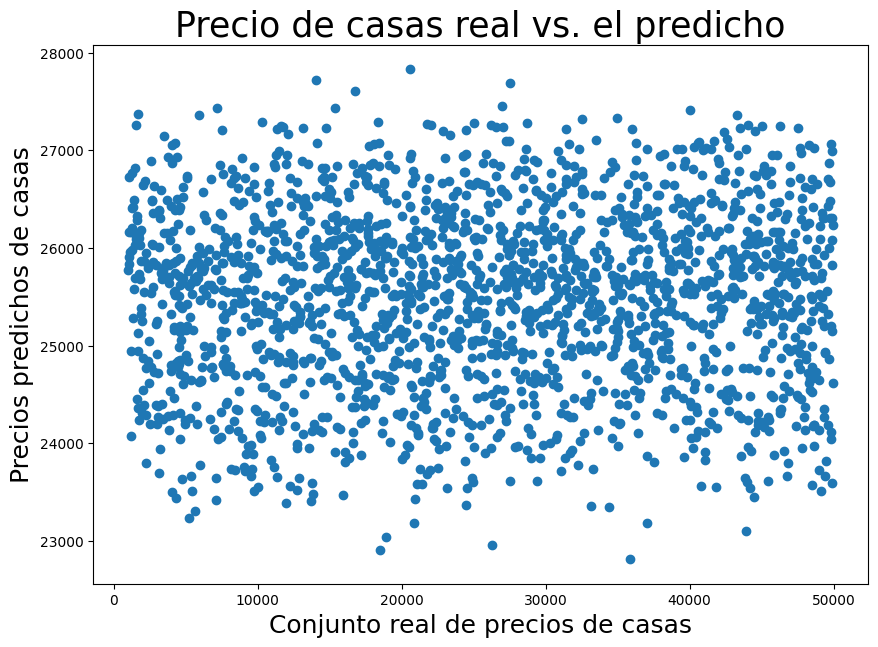

In [68]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

/tmp/ipython-input-1939217874.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograma de residuos para verificar la normalidad '}, xlabel='Residuos', ylabel='Densidad del kernel'>

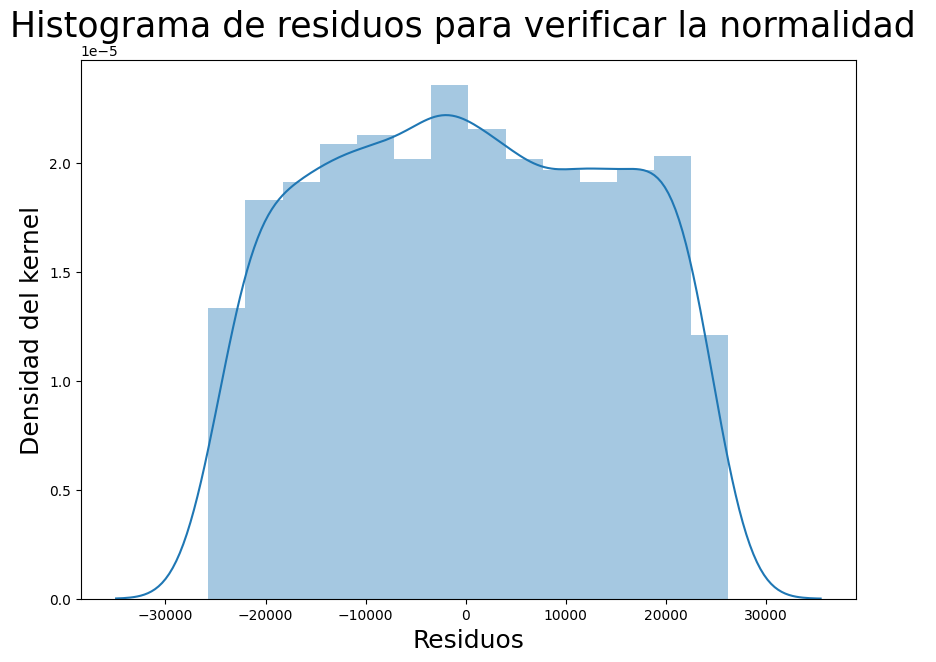

In [69]:
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos para verificar la normalidad ",fontsize=25)
plt.xlabel("Residuos",fontsize=18)
plt.ylabel("Densidad del kernel", fontsize=18)
sns.distplot([y_test-predictions])

**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


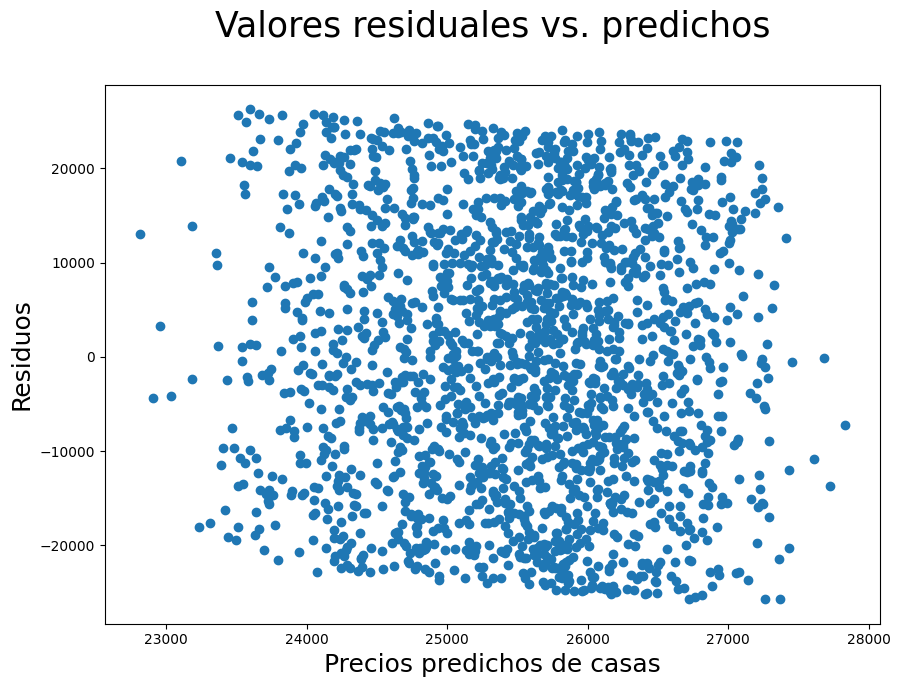

In [70]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)
plt.xlabel("Precios predichos de casas",fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Métricas de evaluación de la regresión**

In [71]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 12061.318641232008
Mean square error (MSE): 197345409.21354935
Root mean square error (RMSE): 14047.968152496265


**Valor R cuadrado**

In [72]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Valor R-squared de las predicciones: -0.001
